# Problem Statement

### Business Problem Overview

An insurance company is looking to build a model to predict whether their past health insurance policyholders would also be interested in purchasing vehicle insurance from the company. 

An insurance policy is a contract where the company agrees to provide compensation for specific losses, injuries, or death in exchange for regular payments called premiums. 

In this case, the company wants to use information about the customer's demographics, vehicle details, and previous insurance policy information to predict their interest in vehicle insurance. 

This information would be used to target marketing efforts and optimize the company's revenue.

### Business Objective

The business objective for a health insurance cross-sell prediction is to identify potential customers who are likely to purchase additional health insurance products, such as supplemental coverage or dental insurance. 

This allows the insurance company to target their marketing efforts towards these individuals, potentially increasing sales and revenue. 

Additionally, by identifying and targeting high-risk customers, the insurance company can also improve their risk management and profitability.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [3]:
# Viewing data's first 5 row

data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
# Chicking shape of data

data.shape

(381109, 12)

#### Data has 381109 rows and 12 columns.

### Variables Description 

id          : Unique ID for customer

Gender        : Male/Female

Age         : Age of customer

Driving License   : Customer has DL or not

Region_Code       : Unique code for the region of the customer

Previously_insured         : Customer already has vehicle insurance or not

Vehicle_age       : Age of the vehicle

Vehicle_damage     : Past damages present or not

Annual_premium      : The amount customer needs to pay as premium

PolicySalesChannel      : Anonymized Code for the channel of outreaching to the customer ie.
                          Different Agents, Over Mail, Over Phone, In Person, etc
                          
Vintage           : Number of Days, Customer has been associated with the company  

Response      : Customer is interested or not       

In [5]:
# Checking data types

data.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

## Ckechking null or missing values

In [6]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### In our data there no null or missing values

## Checking unique values in each feature

In [7]:
data.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

## Data Describe

In [8]:
data.describe() 

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [9]:
# Creating copy of the current data and assigning to df
df=data.copy()

In [10]:
# Creating interested Response dataset
df_Response=df[(df['Response']==1)]

In [11]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

## Exploring Response Labels - Univariate analysis

Text(0.5, 1.0, 'Pie Chart For Response')

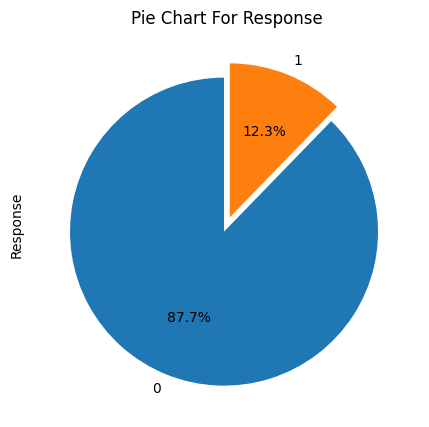

In [12]:
df['Response'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',startangle=90, figsize=(5,5))
plt.title('Pie Chart For Response')

##### 1. Why did you pick the specific chart?

Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. Unlike bar graphs and line graphs, pie charts do not show changes over time.

##### 2. What is/are the insight(s) found from the chart?

Our data is imblance

Any data with unequal class distribution is technically imblance.

In our data 87.7% data not interested Response and remaining 12.3%  interested. 

##### 3. Will the gained insights help creating a positive business impact? 

In your case, with 87.7% of the data being "not interested" in purchasing vehicle insurance, and only 12.3% being "interested", the model may not be able to accurately predict the "interested" class. This could lead to a high number of false negatives (predicting "not interested" when the customer is actually "interested") and a low number of true positives (predicting "interested" when the customer is actually "interested").

If the data is highly imbalanced, with a large majority of the data belonging to one class, it can be difficult for a model to accurately predict the minority class. This is because the model will likely be trained to predict the majority class more often, resulting in a higher accuracy overall but a lower accuracy for the minority class.

## Exploring Gender feature - Univariate and Bivariate analysis

In [13]:
# Number of Unique gender

df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

Text(0.5, 1.0, 'Pie Chart For Gender')

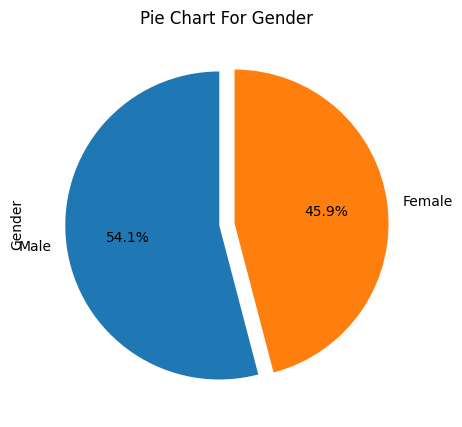

In [14]:
df['Gender'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',startangle=90, figsize=(5,5))
plt.title('Pie Chart For Gender')

##### 1. Why did you pick the specific chart?

Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. Unlike bar graphs and line graphs, pie charts do not show changes over time.

##### 2. What is/are the insight(s) found from the chart?

In our data 54.1% Male and 45.9%  Female. 


In [15]:
# sns.set(style="whitegrid")
# plt.figure(figsize=(8,5))
# total = float(len(df))
# ax = sns.countplot(x="Gender", hue="Response", data=df)
# plt.title('Data provided for each event', fontsize=20)
# for p in ax.patches:
#     percentage = '{:.1f}%'.format(100 * p.get_height()/total)
#     x = p.get_x() + p.get_width()
#     y = p.get_height()
#     ax.annotate(percentage, (x, y),ha='center')
# plt.show()

In [16]:
# creating df_genderwise_Response_count%

gender=df['Gender'].unique()
interested_response=[df[(df['Gender']==gen)]['Response'].value_counts()[1] for gen in gender]
not_interested_response=[df[(df['Gender']==gen)]['Response'].value_counts()[0] for gen in gender]

df_genderwise_Response_count=pd.DataFrame({'Gender' : gender,
                                       'interested_response'  : interested_response,
                                       'not_interested_response' : not_interested_response})
df_genderwise_Response_count
df_genderwise_Response_count['interested_response %']= round(((df_genderwise_Response_count['interested_response'])/
                                                 ((df_genderwise_Response_count['interested_response'])+ 
                                                         (df_genderwise_Response_count['not_interested_response'])))*100,2)
df_genderwise_Response_count['not_interested_response %']= round(((df_genderwise_Response_count['not_interested_response'])/
                                                  ((df_genderwise_Response_count['interested_response'])+ 
                                                         (df_genderwise_Response_count['not_interested_response'])))*100,2)
df_genderwise_Response_count

,Gender,interested_response,not_interested_response,interested_response %,not_interested_response %
0,Male,28525,177564,13.84,86.16
1,Female,18185,156835,10.39,89.61


Text(0.5, 1.0, 'Response count gender wise')

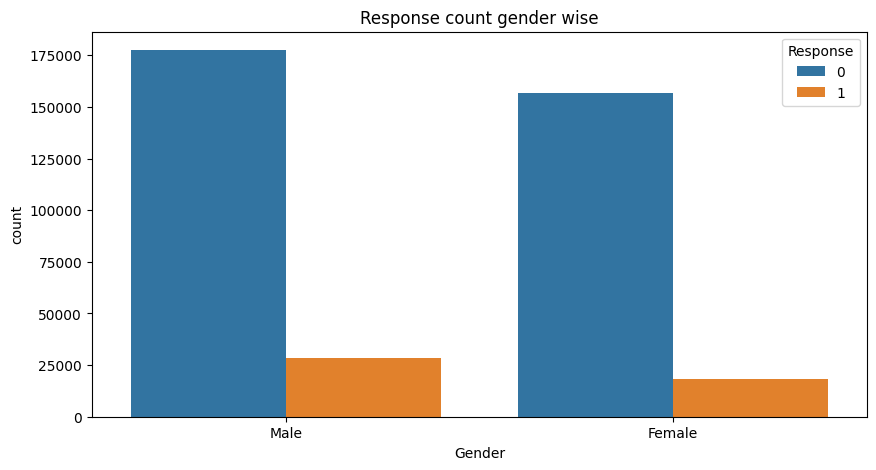

In [17]:
# Ploting Response count gender wise

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x=df['Gender'],hue='Response',data=df)
plt.title('Response count gender wise')

##### 1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

There are two gender

interested response of males are 13.84% 

interested response of females are 10.39% 

##### 3. Will the gained insights help creating a positive business impact?   

Yes, The insight that the interested response rate for males is higher (13.84%) than for females (10.39%) could be used to inform the company's marketing efforts.

## Exploring Gender feature - Univariate and Bivariate analysis

In [18]:
# Creating df of age with respect to interested_response and not_interested_response

Age_interested_response=df[(df['Response']==1)]
Age_not_interested_response=df[(df['Response']==0)]

In [19]:
# Mean 

print('Mean of Age of all data',df['Age'].mean())
print('Mean of Age of interested response',Age_interested_response['Age'].mean())
print('Mean of Age of not interested response',Age_not_interested_response['Age'].mean())

Mean of Age of all data 38.822583565331705
Mean of Age of interested response 43.435559837293944
Mean of Age of not interested response 38.17822720761725


In [20]:
# Median 

print('Median of Age of all data',df['Age'].median())
print('Median of Age of interested response',Age_interested_response['Age'].median())
print('Median of Age of not interested response',Age_not_interested_response['Age'].median())

Median of Age of all data 36.0
Median of Age of interested response 43.0
Median of Age of not interested response 34.0


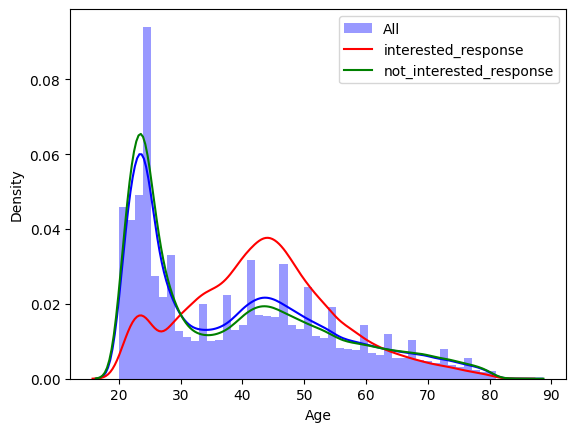

In [21]:
sns.distplot(df['Age'], color='blue' , label='All') 
sns.distplot(Age_interested_response['Age'],color='red' , label='interested_response',hist=False)
sns.distplot(Age_not_interested_response['Age'],color='green' , label='not_interested_response',hist=False) 
plt.legend()

##### 1. Why did you pick the specific chart?

The distplot, or distribution plot, is a useful tool in Exploratory Data Analysis (EDA) for visualizing the distribution of a dataset. It combines a histogram, which shows the frequency of data points in different bins which shows the probability density function of the data.

To know the distribution of feature

##### 2. What is/are the insight(s) found from the chart?
It appears that the mean and median age of customers who are "interested" in purchasing vehicle insurance is higher than the mean and median age of customers who are "not interested" in purchasing vehicle insurance.

The mean age of all customers is 38.82, while the mean age of "interested" customers is 43.44, and the mean age of "not interested" customers is 38.18. Similarly, the median age of all customers is 36.0, while the median age of "interested" customers is 43.0, and the median age of "not interested" customers is 34.0.

##### 3. Will the gained insights help creating a positive business impact?  
The insights gained from the mean and median age of all data, as well as the mean and median age of the "interested" and "not interested" responses can potentially help create a positive business impact for the insurance company.

From the chart, it appears that the mean and median age of customers who are "interested" in purchasing vehicle insurance is higher than those who are "not interested." This suggests that older customers may be more likely to be interested in purchasing additional insurance policies from the company.

The company can use this information to target their marketing efforts towards older customers, as they may be more likely to respond positively to offers for vehicle insurance. 

Additionally, the company may also want to consider offering discounts or promotions to older customers in order to incentivize them to purchase additional policies.

<Figure size 1000x800 with 0 Axes>

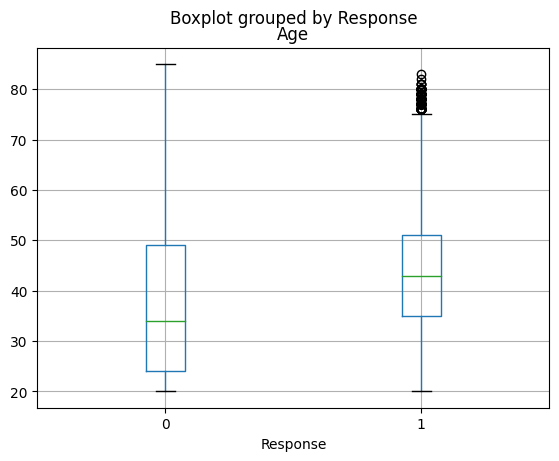

In [22]:
#Analysing by using boxplot diagram between 'Age' and 'response'
fig = plt.figure(figsize =(10, 8)) 
df.boxplot(column='Age', by='Response')
fig.suptitle('Age', fontsize=14, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

boxplots are useful for identifying patterns and outliers in the data. For example, if a boxplot shows a large number of outliers, it could indicate an issue with the data collection or a potential problem with the data. Additionally, boxplots can be used to compare the distribution of different datasets, or to compare the distribution of a single dataset across different groups or categories.

##### 2. What is/are the insight(s) found from the chart?

the age have some outliers in upper side of interested response

##### 3. Will the gained insights help creating a positive business impact?
The insight that age has some outliers in the upper side of the "interested" response in a Health Insurance Cross Sell Prediction, could potentially be useful in creating a positive business impact.

It suggests that older customers may be more likely to be interested in purchasing vehicle insurance from the company. This information can be used to target marketing efforts to older age groups, or to tailor the sales pitch to better appeal to older customers.

## Exploring Driving_License feature - Univariate and Bivariate analysis


In [23]:
# cheking unique values

df['Driving_License'].unique()

array([1, 0], dtype=int64)

In [24]:
# checking value count
df['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

Text(0.5, 1.0, 'Pie Chart For Driving_License')

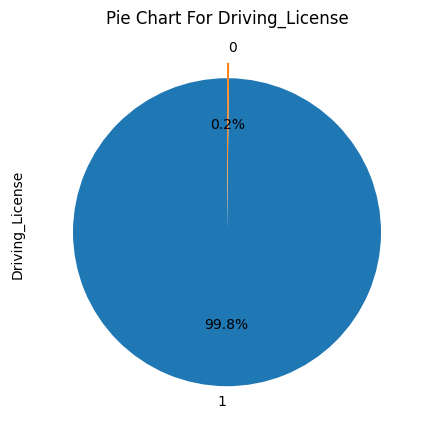

In [25]:
# Ploting value counts

df['Driving_License'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',startangle=90, figsize=(5,5))
plt.title('Pie Chart For Driving_License')

##### 1. Why did you pick the specific chart?

Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. Unlike bar graphs and line graphs, pie charts do not show changes over time.

##### 2. What is/are the insight(s) found from the chart?

Only 0.2% customer did not have Driving License.

In [26]:
# creating df Driving_License interested Response count%

D_L=df['Driving_License'].unique()
interested_response=[df[(df['Driving_License']==gen)]['Response'].value_counts()[1] for gen in D_L]
not_interested_response=[df[(df['Driving_License']==gen)]['Response'].value_counts()[0] for gen in D_L]

df_D_Lrwise_Response_count=pd.DataFrame({'Driving_License' : D_L,
                                       'interested_response'  : interested_response,
                                       'not_interested_response' : not_interested_response})

df_D_Lrwise_Response_count['interested_response %']= round(((df_D_Lrwise_Response_count['interested_response'])/
                                                 ((df_D_Lrwise_Response_count['interested_response'])+ 
                                                         (df_D_Lrwise_Response_count['not_interested_response'])))*100,2)
df_D_Lrwise_Response_count['not_interested_response %']= round(((df_D_Lrwise_Response_count['not_interested_response'])/
                                                  ((df_D_Lrwise_Response_count['interested_response'])+ 
                                                         (df_D_Lrwise_Response_count['not_interested_response'])))*100,2)
df_D_Lrwise_Response_count

,Driving_License,interested_response,not_interested_response,interested_response %,not_interested_response %
0,1,46669,333628,12.27,87.73
1,0,41,771,5.05,94.95


Text(0.5, 1.0, 'Response count Driving License wise')

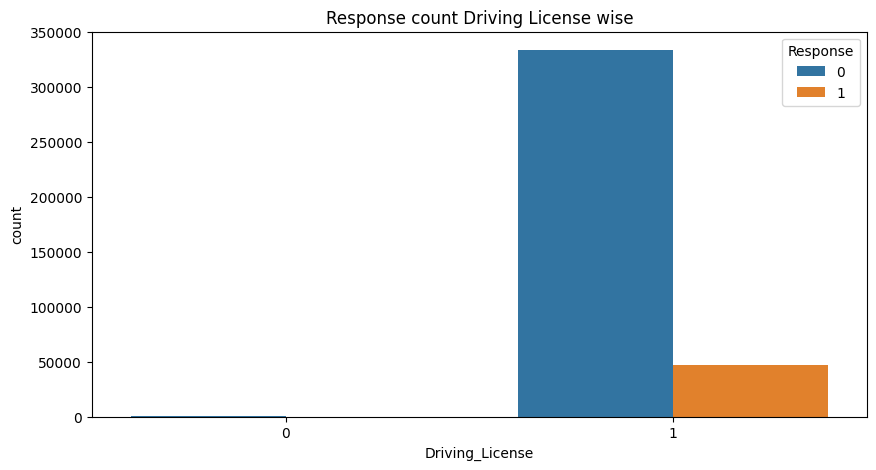

In [27]:
# Ploting Response count Driving_License wise

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x=df['Driving_License'],hue='Response',data=df)
plt.title('Response count Driving License wise')

##### 1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

A large percentage of customers with a driving license (12.27%) have shown interest in purchasing health insurance.

A relatively small percentage of customers without a driving license (5.05%) have shown interest in purchasing health insurance.

Having a driving license may be a strong indicator of a customer's likelihood to purchase health insurance.

##### 3. Will the gained insights help creating a positive business impact?

Yes, the gained insights can help create a positive business impact. By identifying that a large percentage of customers with a driving license have shown interest in purchasing health insurance, the company can focus their marketing and sales efforts on targeting customers who have a driving license. 

This can potentially increase the number of customers interested in purchasing health insurance, resulting in increased revenue for the company. 

Additionally, the company can also use this information to develop targeted campaigns and offers for customers who do not have a driving license, in order to increase the percentage of customers without a driving license showing interest in purchasing health insurance.

## Exploring Region Code feature - Univariate and Bivariate analysis

In [28]:
# cheking unique values
df['Region_Code'].unique()

array([28.,  3., 11., 41., 33.,  6., 35., 50., 15., 45.,  8., 36., 30.,
       26., 16., 47., 48., 19., 39., 23., 37.,  5., 17.,  2.,  7., 29.,
       46., 27., 25., 13., 18., 20., 49., 22., 44.,  0.,  9., 31., 12.,
       34., 21., 10., 14., 38., 24., 40., 43., 32.,  4., 51., 42.,  1.,
       52.])

In [30]:
# cheking unique values
df['Region_Code'].nunique()

53

In [29]:
# checking value count
df['Region_Code'].value_counts()

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

In [35]:
# creating df Region_Code interested Response count%

Region_Code=(df['Region_Code'].unique()).astype('int')
interested_response=[df[(df['Region_Code']==code)]['Response'].value_counts()[1] for code in Region_Code]
not_interested_response=[df[(df['Region_Code']==code)]['Response'].value_counts()[0] for code in Region_Code]

df_Region_Codewise_Response_count=pd.DataFrame({'Region_Code' : Region_Code,
                                       'interested_response'  : interested_response,
                                       'not_interested_response' : not_interested_response})

df_Region_Codewise_Response_count['interested_response %']= round(((df_Region_Codewise_Response_count['interested_response'])/
                                                 ((df_Region_Codewise_Response_count['interested_response'])+ 
                                                         (df_Region_Codewise_Response_count['not_interested_response'])))*100,2)
df_Region_Codewise_Response_count['not_interested_response %']= round(((df_Region_Codewise_Response_count['not_interested_response'])/
                                                  ((df_Region_Codewise_Response_count['interested_response'])+ 
                                                         (df_Region_Codewise_Response_count['not_interested_response'])))*100,2)
df_Region_Codewise_Response_count

,Region_Code,interested_response,not_interested_response,interested_response %,not_interested_response %
0,28,19917,86498,18.72,81.28
1,3,1181,8070,12.77,87.23
2,11,1041,8191,11.28,88.72
3,41,2224,16039,12.18,87.82
4,33,760,6894,9.93,90.07
5,6,439,5841,6.99,93.01
6,35,865,6077,12.46,87.54
7,50,642,9601,6.27,93.73
8,15,958,12350,7.20,92.80
9,45,615,4990,10.97,89.03


In [37]:
df_Region_Codewise_Response_count.sort_values(by=['interested_response %'],ascending= False)

,Region_Code,interested_response,not_interested_response,interested_response %,not_interested_response %
43,38,389,1637,19.20,80.80
0,28,19917,86498,18.72,81.28
17,19,250,1285,16.29,83.71
48,4,285,1516,15.82,84.18
19,23,300,1660,15.31,84.69
49,51,28,155,15.30,84.70
44,24,342,2073,14.16,85.84
24,7,432,2847,13.17,86.83
30,18,678,4475,13.16,86.84
1,3,1181,8070,12.77,87.23


In [41]:
#Filtering Region_Code which have interested_response % rate more than 10% 

df_Region_Codewise_Response_count_more_10=df_Region_Codewise_Response_count.sort_values(by=['interested_response %'],ascending=False)[(df_Region_Codewise_Response_count['interested_response %']>=10)]
df_Region_Codewise_Response_count_more_10

,Region_Code,interested_response,not_interested_response,interested_response %,not_interested_response %
43,38,389,1637,19.20,80.80
0,28,19917,86498,18.72,81.28
17,19,250,1285,16.29,83.71
48,4,285,1516,15.82,84.18
19,23,300,1660,15.31,84.69
49,51,28,155,15.30,84.70
44,24,342,2073,14.16,85.84
24,7,432,2847,13.17,86.83
30,18,678,4475,13.16,86.84
1,3,1181,8070,12.77,87.23


Text(0, 0.5, 'interested_response %')

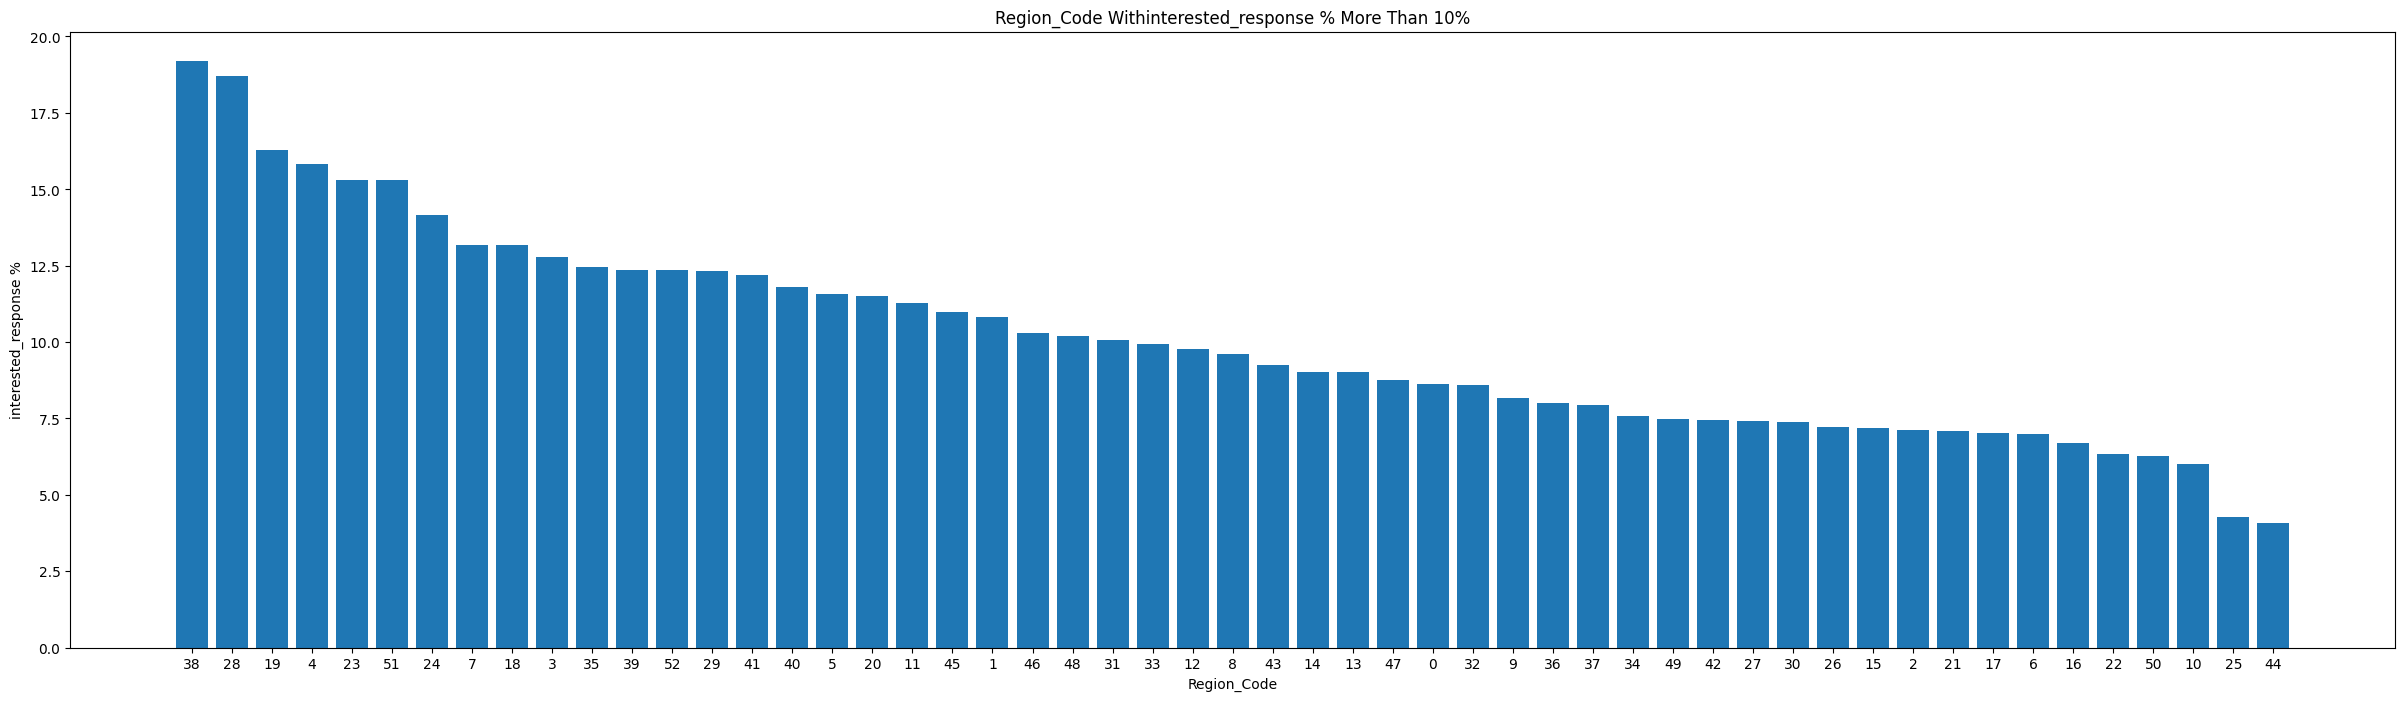

In [47]:
# bar plot of Region_Code which have interested_response % more than 10% 

plt.figure(figsize=(30,8))
plt.bar(df_Region_Codewise_Response_count_more_10['Region_Code'].astype('str'),
        df_Region_Codewise_Response_count_more_10['interested_response %'])
plt.title('Region_Code Withinterested_response % More Than 10%')
plt.xlabel('Region_Code')
plt.ylabel('interested_response %')

In [48]:
### Region_Code having interested_response % more than 10%

df_Region_Codewise_Response_count_more_10['Region_Code'].unique()

array([38, 28, 19,  4, 23, 51, 24,  7, 18,  3, 35, 39, 52, 29, 41, 40,  5,
       20, 11, 45,  1, 46, 48, 31, 33, 12,  8, 43, 14, 13, 47,  0, 32,  9,
       36, 37, 34, 49, 42, 27, 30, 26, 15,  2, 21, 17,  6, 16, 22, 50, 10,
       25, 44])

##### 1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to states, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

Region_Code '38' have high interested_response % of 19.20 %.

38, 28, 19,  4, 23, 51, 24,  7, 18,  3, 35, 39, 52, 29, 41, 40,  5,20, 11, 45,  1, 46, 48, 31, 33, 12,  8, 43, 14, 13, 47,  0, 32,  9,36, 37, 34, 49, 42, 27, 30, 26, 15,  2, 21, 17,  6, 16, 22, 50, 10, 25, and 44 have interested_response % more than 10%.

##### 3. Will the gained insights help creating a positive business impact? 

Yes, the gained insights can help create a positive business impact by identifying regions with high interested_response percentages, which can be targeted for cross-selling health insurance. By focusing on these regions, the company may be able to increase their sales and revenue. 

Additionally, by identifying regions with interested_response percentages above 10%, the company can also prioritize which regions to focus their marketing efforts on. 

In [50]:
#Filtering Region_Code which have interested_response % rate less than 10% 

df_Region_Codewise_Response_count_less_10=df_Region_Codewise_Response_count.sort_values(by=['interested_response %'])[(df_Region_Codewise_Response_count['interested_response %']<10)]
df_Region_Codewise_Response_count_less_10

,Region_Code,interested_response,not_interested_response,interested_response %,not_interested_response %
34,44,33,775,4.08,95.92
28,25,107,2396,4.27,95.73
41,10,263,4111,6.01,93.99
7,50,642,9601,6.27,93.73
33,22,83,1226,6.34,93.66
14,16,134,1873,6.68,93.32
5,6,439,5841,6.99,93.01
22,17,184,2433,7.03,92.97
40,21,303,3963,7.10,92.90
23,2,287,3751,7.11,92.89


Text(0, 0.5, 'interested_response %')

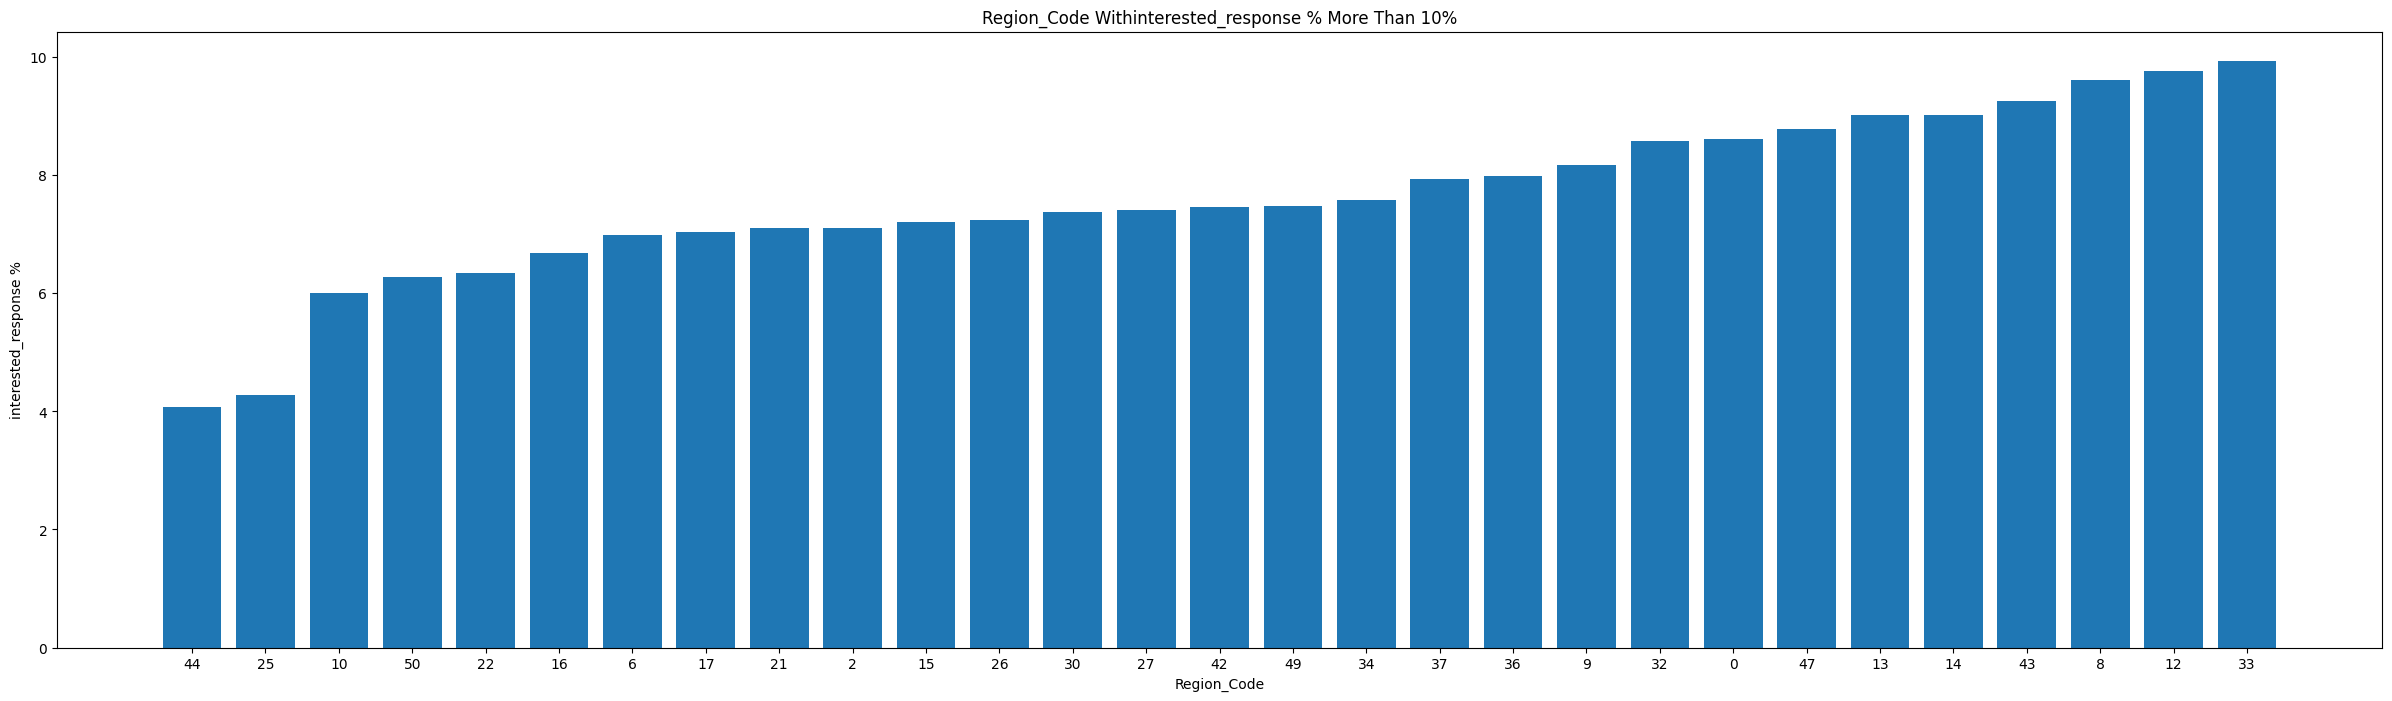

In [51]:
# bar plot of Region_Code which have interested_response % less than 10% 

plt.figure(figsize=(30,8))
plt.bar(df_Region_Codewise_Response_count_less_10['Region_Code'].astype('str'),
        df_Region_Codewise_Response_count_less_10['interested_response %'])
plt.title('Region_Code Withinterested_response % More Than 10%')
plt.xlabel('Region_Code')
plt.ylabel('interested_response %')

In [53]:
### Region_Code having interested_response % less than 10%

df_Region_Codewise_Response_count_less_10['Region_Code'].unique()

array([44, 25, 10, 50, 22, 16,  6, 17, 21,  2, 15, 26, 30, 27, 42, 49, 34,
       37, 36,  9, 32,  0, 47, 13, 14, 43,  8, 12, 33])

##### 1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to states, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

Region_Code '44' have less interested_response % of 4.08 %.

Region_Code 44, 25, 10, 50, 22, 16,  6, 17, 21,  2, 15, 26, 30, 27, 42, 49, 34, 37, 36,  9, 32,  0, 47, 13, 14, 43,  8, 12, and 33 have interested_response % less than 10%.

##### 3. Will the gained insights help creating a positive business impact? 

Yes, the gained insights can help in creating a positive business impact by targeting the regions with higher interested_response % for cross-selling health insurance products.

By identifying the regions with low interested_response %, the company can focus on strategies to increase awareness and interest in these areas. This can lead to increased sales and revenue for the company.

## Exploring Previously_Insured feature - Univariate and Bivariate analysis